## 8-2 가중치 초기화(Weights Initialization)

1. 선형 함수 가중치 초기화 <br>
2. 비선형 함수 가중치 초기화 <br><br>

- 만약 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값들도 치우치게 되고, 결국 표현할 수 있는 신경망의 수가 적어지는 문제가 발생. <br>
- 보통 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생할 수 있다. <br>
=>즉, 모델의 활성화 값이 골고루 분포되는 것이 중요함, 

In [1]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
    model = models.Sequential()
    model.add(layers.Input(shape=(400, 20), name='input'))
    model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
    model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
    return model

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
    input = np.random.randn(400, 20)

    plt.figure(figsize=(12, 6))
    for i in range(1, 6):
        name = 'hidden' + str(i)
        layer = model.get_layer(name)
        input = layer(input)
        plt.subplot(1, 6, i)
        plt.title(name)
        plt.hist(input, 20, range=(-1, 1))
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()

#### 선형함수 가중치 초기화

- activations.sigmoid를 사용하여 초기화 방법들을 비교,
- sigmoid 함수는 전체적으로 볼떄 비선형 함수이지만 특정 범위(-1,1)에서는 선형 함수

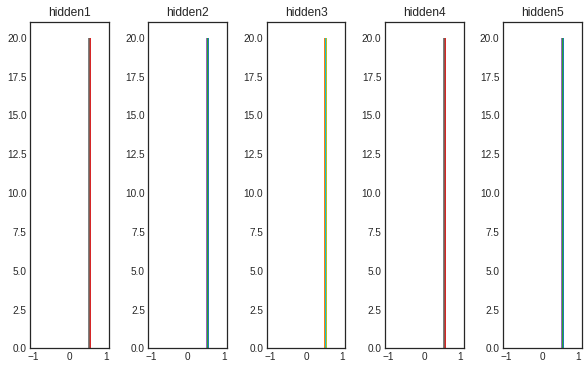

In [3]:
from tensorflow.keras import initializers, activations

# 제로 초기화
# Initializers.Zeros()를 이용해 가중치를 제로값으로 초기화함
model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)


# 가중치를 제로값으로 초기화할 경우 각 레이어의 가중치 값 분포가 특정한 값으로만 몰려 있는 것을 알 수 있다. 
# 가중치 값이 0일 경우에는 오차역전파에서 모든 가중치 값이 똑같이 갱신되어 학습이 올바르게 진행될 수 없다.

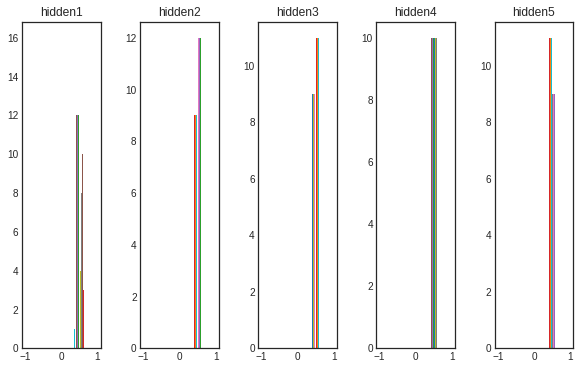

In [4]:
# 정규분포 초기화

# Initializers.RandomNormal()를 통해 정규분포를 따르도록 무작위 값을 초기화
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)


# 정규분포를 따르도록 무작위 값을 초기화하면 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있다. 
# 그러나 한 곳에 치우쳐 있기 때문에 여전히 신경망의 표현을 제한한다는 문제가 있다.

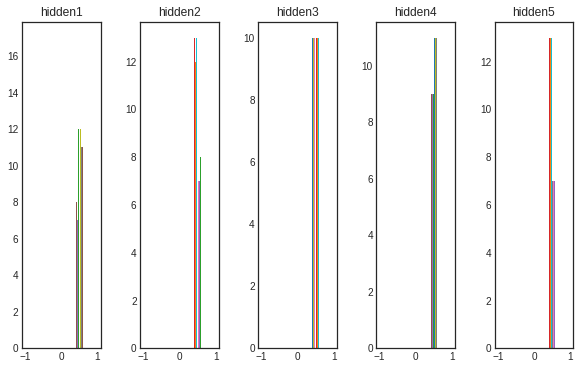

In [5]:
# 균일분포 초기화

# Initializers.RandomUniform()를 통해 균일분포를 따르는 무작위갓으로 초기화
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)


# 균일분포를 따르는 무작위 값으로 초기화한 결과도 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있다. 
# 그러나 활성화 값이 균일하지 않으므로 역전파로 전해지는 기울기 값이 사라질 수 있다.

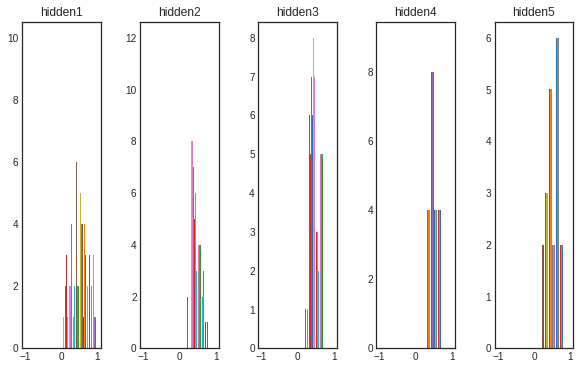

In [6]:
# Xavier(Glorot) 정규분포 초기화

# 은닉층의 노드의 수가 n이라면 표준편차가 1/root n인 분포로 초기화
# Initializers.GlorotNormal()를 사용  
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)


# 비교적 분포로 고르고 레이어마다 표현이 잘 되고 있는 것을 알 수 있다. 
# 즉, 더 많은 가중치에 역전파가 전달이 가능함. 
# 일반적으로 Xavier(Glorot) 방법은 활성화 함수가 선형함수인 경우에 매우 적합.

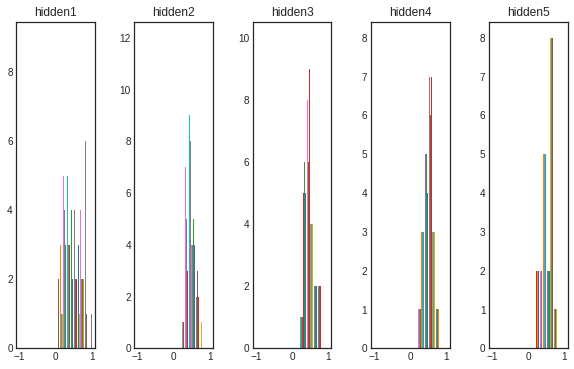

In [7]:
# Xavier(Glorot) 균일분포 초기화

# Initializers.GlorotUniform()를 사용  
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)


# Xavier(Glorot) 균일분포 초기화를 이용한 결과도 마찬가지로 잘 분포되어 있

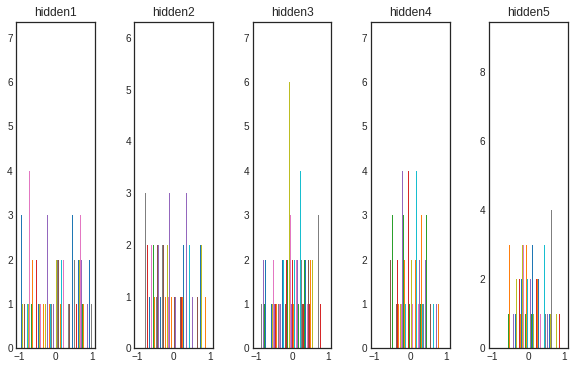

In [8]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

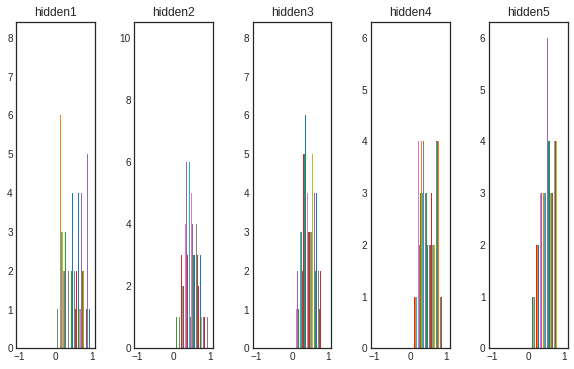

In [9]:
# He 정규분포 초기화

# 표준편차가 root(2/n)인 분포를 가지도록 초기화
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)


# 시각화한 결과보면 활성화값 분포가 균일하게 분포되어 있다.
# ReLU와 같은 비선형함수일 떄 더 적합

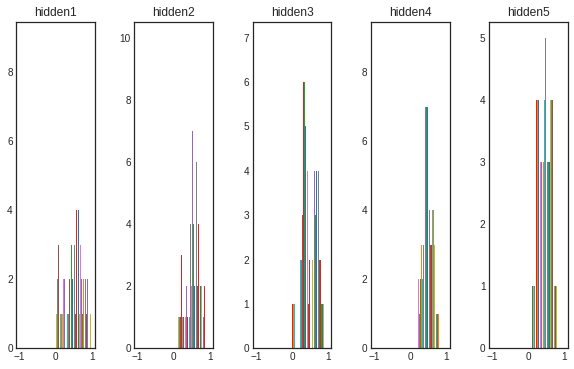

In [10]:
# He 균일분포 초기화

model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)
# 가중치 값들이 잘 분포되어 있음을 알 수 있음

#### 비선형 함수 가중치 초기화

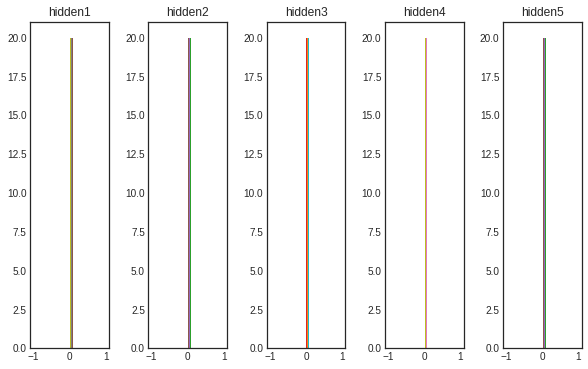

In [11]:
# 제로 초기화

# 가중치를 제로값으로 초기화한 경우, 
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

# 시각화 결과를 보면 레이어의 가중치 분포가 0에만 몰려 있는 것을 알 수 있다. 
# 활성화 함수로 relu를 사용하였기 때문에 0인 값은 그대로 0에만 머무는 것을 알 수 있다.

# relu(0) = 0

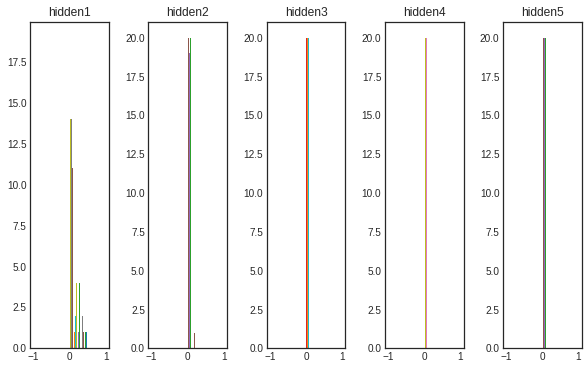

In [12]:
# 정규분포 초기화

model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)


# 마찬가지로 hidden1 레이어를 제외하고는 0에 치우쳐 있는 문제가 있다.

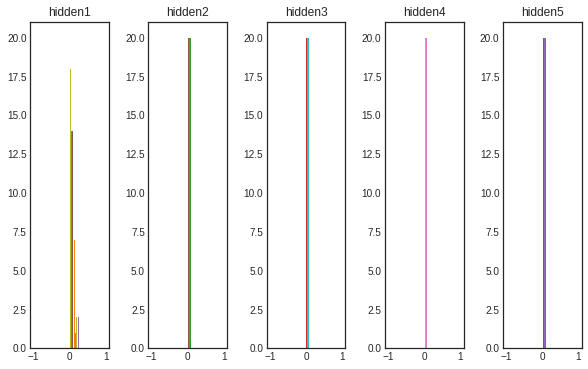

In [13]:
# 균일분포 초기화

model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)


# 처음 레이어를 제외하고는 가중치 값이 0에 치우쳐 있는 것을 알 수 있다.

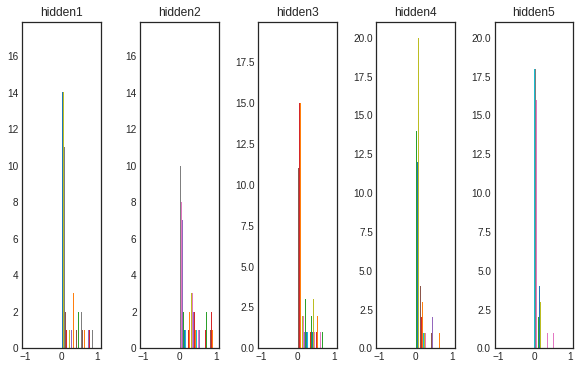

In [14]:
# Xavier(Glorot) 정규분포 초기화

model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)


# Xavier 초기화 방법은 relu 특성상 0인 값이 많지만, 
# 전체 레이어를 보더라도 어느정도 분포가 퍼져있는 것을 알 수 있다.

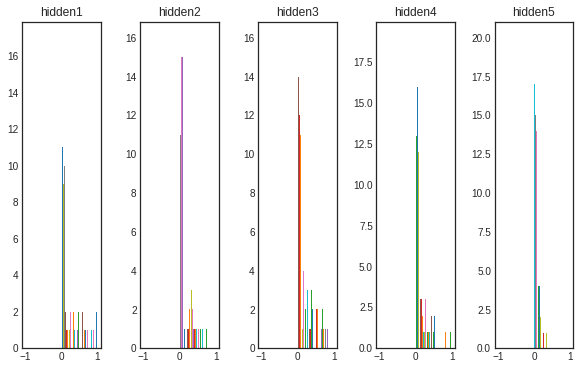

In [15]:
# Xavier(Glorot) 균일분포 초기화

model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)


# 균일분포도 정규분포와 유사한 형태의 분포를 보여주고 있다.

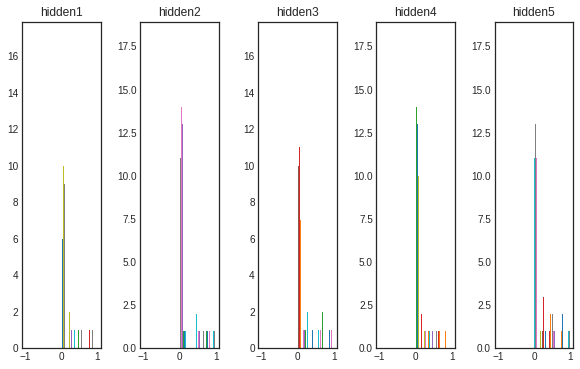

In [16]:
# He 정규분포 초기화

model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

# He 초기화는 일반적으로 비선형 함수에 더 적합하다고 알려져있음
# 시각화된 결과도 어느정도 분포가 고르게 형성되어 있음을 알 수 있습니다.

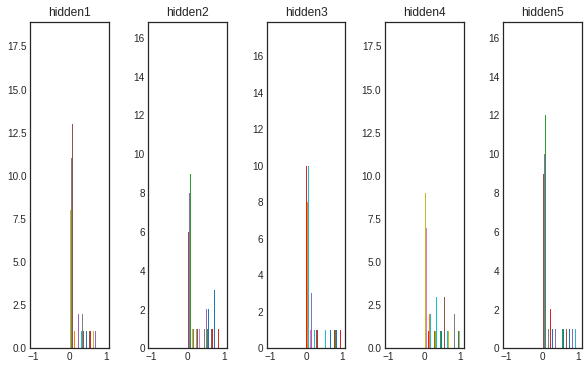

In [17]:
# He 균일분포 초기화

model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

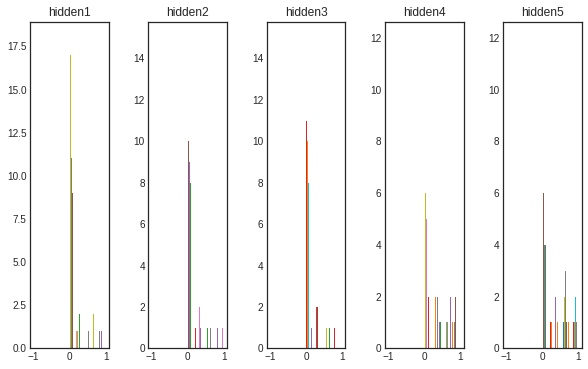

In [18]:
# [play ground]
# 사용해보고 싶은 활성화함수, 초기화 방법을 각각 activation, initializer에 입력해주세요.

model = build_model(activation = 'relu', initializer = 'HeUniform')
show_layer(model)

## 8-3 Reuters 딥러닝 모델 예제

데이터셋은 뉴스 기사 텍스트와 46개의 토픽으로 구성되어 있다. <br>
가중치 초기화 실습을 진행하겠다.

#### 데이터 로드 및 전처리

reuters.load_data() 함수를 통해 다운로드가 가능합니다. 본 예제에서는 num_words를 10000개로 제한하여 데이터를 로드합니다. 기본적으로 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분되어 있습니다. 레이블을 통해 뉴스 기사의 주제로 46개가 있는 것을 알 수 있습니다.

In [19]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [20]:
word_index = reuters.get_word_index()
word_index

565248/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [21]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

In [22]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [23]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [25]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [26]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### 모델 구성

Reuters 데이터셋을 주제별로 분류하기 위한 딥러닝 모델을 정의합니다. 순차적으로 레이어를 추가하여 단순한 모델을 생성하기 위해 Sequential() 함수를 사용합니다.

첫번째는 유닛수 256개, 활성화 함수는 'relu', 입력 차원은 10000, 이름은 input인 Dense 레이어를 추가합니다. 두번째도 마찬가지로 유닛수 256개를 가지고, relu 활성화 함수를 사용하며 이름은 hidden인 Dense 레이어를 추가합니다. 세번째는 뉴스 주제 갯수로 유닛수를 46개로 지정하고, 다중 분류이므로 활성화 함수는 softmax를 사용하고, 이름은 output으로 지정한 Dense 레이어를 추가합니다.

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

#### 모델 컴파일 및 학습

In [28]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 36ms/step - loss: 2.1181 - accuracy: 0.5746 - val_loss: 1.4006 - val_accuracy: 0.6928
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 1.0706 - accuracy: 0.7681 - val_loss: 1.1197 - val_accuracy: 0.7618
Epoch 3/40
18/18 [==============================] - 0s 15ms/step - loss: 0.7328 - accuracy: 0.8497 - val_loss: 1.0026 - val_accuracy: 0.7858
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 0.5295 - accuracy: 0.8899 - val_loss: 0.9421 - val_accuracy: 0.7850
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3879 - accuracy: 0.9195 - val_loss: 0.9221 - val_accuracy: 0.7921
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2970 - accuracy: 0.9352 - val_loss: 0.9464 - val_accuracy: 0.7934
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2409 - accuracy: 0.9428 - val_loss: 0.9360 - val_accuracy: 0.7992
Epoch 8/40
18

생성한 딥러닝 모델을 이용해 Reuters 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 40으로 지정합니다. 배치 사이즈는 512로 지정하고, 검증을 위해서 테스트 데이터인 x_test와 y_test를 지정하여 fit() 함수를 실행시킵니다.

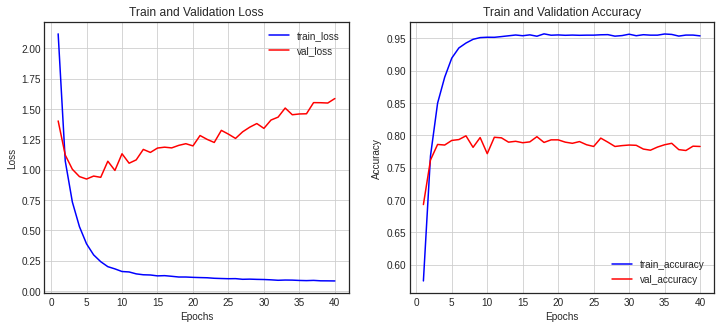

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

#### 가중치 초기화

In [31]:
def build_model(initializer):
    model = models.Sequential()
    model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
    model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
    model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
    return history

In [32]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs = range(1, len(h1_loss) + 1)
    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [33]:
# 제로 초기화

# 가중치 값을 0으로 초기화하는 모델을 생성하여 학습한다.
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 1s 34ms/step - loss: 3.8103 - accuracy: 0.2290 - val_loss: 3.7956 - val_accuracy: 0.3620
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7842 - accuracy: 0.3517 - val_loss: 3.7727 - val_accuracy: 0.3620
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7615 - accuracy: 0.3517 - val_loss: 3.7505 - val_accuracy: 0.3620
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7391 - accuracy: 0.3517 - val_loss: 3.7287 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 3.7170 - accuracy: 0.3517 - val_loss: 3.7070 - val_accuracy: 0.3620
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 3.6952 - accuracy: 0.3517 - val_loss: 3.6856 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 3.6734 - accuracy: 0.3517 - val_loss: 3.6643 - val_accuracy: 0.3620
Epoch 8/40
18

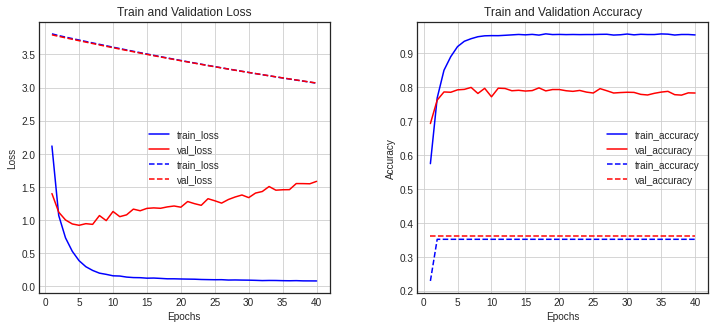

In [34]:
diff_history(history, zero_history)

In [35]:
# 정규분포 초기화

normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 [==============================] - 1s 32ms/step - loss: 2.1987 - accuracy: 0.5384 - val_loss: 1.5538 - val_accuracy: 0.6616
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.2863 - accuracy: 0.7085 - val_loss: 1.2957 - val_accuracy: 0.6946
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.9781 - accuracy: 0.7789 - val_loss: 1.1703 - val_accuracy: 0.7364
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7528 - accuracy: 0.8340 - val_loss: 1.0974 - val_accuracy: 0.7480
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.5921 - accuracy: 0.8673 - val_loss: 1.0056 - val_accuracy: 0.7711
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.4465 - accuracy: 0.9035 - val_loss: 0.9942 - val_accuracy: 0.7743
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3649 - accuracy: 0.9178 - val_loss: 1.0135 - val_accuracy: 0.7765
Epoch 8/40
18

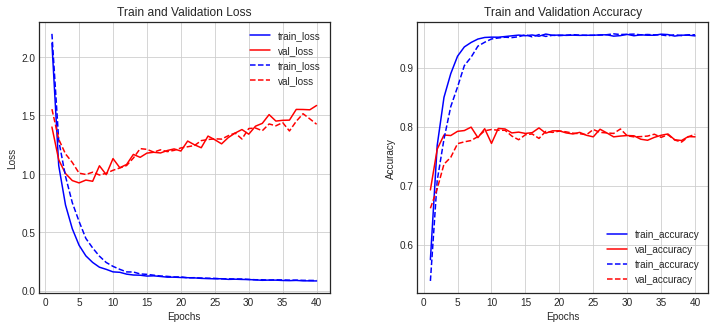

In [36]:
diff_history(history, normal_history)

# 정규분포로 초기화한 결과는 기본 모델과 유사하지만 조금 더디게 학습된 것을 알 수 있습니다.

In [37]:
# Xavier(Glorot)초기화

glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 2.1124 - accuracy: 0.5743 - val_loss: 1.3737 - val_accuracy: 0.6950
Epoch 2/40
18/18 [==============================] - 0s 12ms/step - loss: 1.0794 - accuracy: 0.7606 - val_loss: 1.1726 - val_accuracy: 0.7248
Epoch 3/40
18/18 [==============================] - 0s 12ms/step - loss: 0.7633 - accuracy: 0.8386 - val_loss: 1.0157 - val_accuracy: 0.7680
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.5487 - accuracy: 0.8872 - val_loss: 0.9459 - val_accuracy: 0.7872
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.4084 - accuracy: 0.9116 - val_loss: 0.9128 - val_accuracy: 0.7952
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3124 - accuracy: 0.9309 - val_loss: 0.9239 - val_accuracy: 0.7907
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 0.2513 - accuracy: 0.9404 - val_loss: 0.9454 - val_accuracy: 0.7961
Epoch 8/40
18

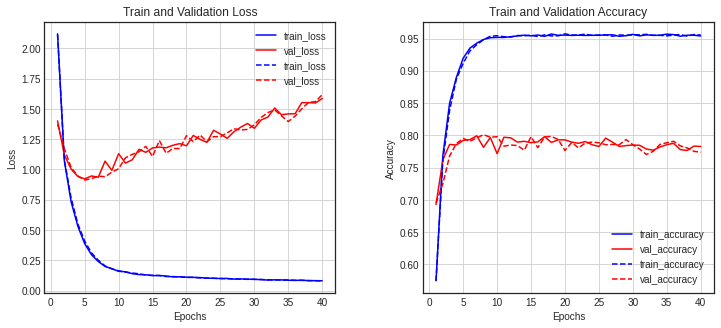

In [38]:
diff_history(history, glorot_history)

# Xavier 초기화 방법은 기존 모델에서 사용하는 균일분포와 매우 유사한 형태로 학습된 것을 알 수 있습니다.

In [39]:
# He 초기화

he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 [==============================] - 1s 33ms/step - loss: 1.9954 - accuracy: 0.5991 - val_loss: 1.2846 - val_accuracy: 0.7164
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 0.9389 - accuracy: 0.7980 - val_loss: 1.0765 - val_accuracy: 0.7556
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.6397 - accuracy: 0.8685 - val_loss: 1.0326 - val_accuracy: 0.7605
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.4445 - accuracy: 0.9067 - val_loss: 0.8907 - val_accuracy: 0.8001
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3325 - accuracy: 0.9289 - val_loss: 0.9167 - val_accuracy: 0.8028
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2558 - accuracy: 0.9395 - val_loss: 0.9412 - val_accuracy: 0.7965
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2076 - accuracy: 0.9485 - val_loss: 0.9845 - val_accuracy: 0.7930
Epoch 8/40
18

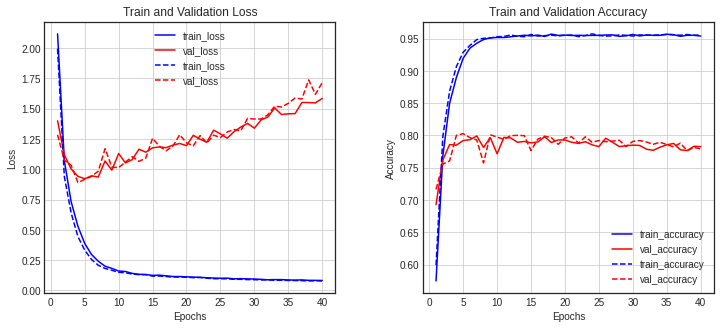

In [40]:
diff_history(history, he_history)

# He 초기화는 기존 모델과 비교하여 작지만 좀 더 빠르게 학습된 것을 알 수 있습니다. 
# 현재 모델이 비선형 함수인 relu를 사용하여 He 초기화에 더 적합한 것을 알 수 있습니다.

Epoch 1/40
18/18 [==============================] - 1s 30ms/step - loss: 1.9921 - accuracy: 0.5865 - val_loss: 1.3161 - val_accuracy: 0.6897
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 0.9724 - accuracy: 0.7869 - val_loss: 1.0755 - val_accuracy: 0.7596
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.6560 - accuracy: 0.8597 - val_loss: 0.9675 - val_accuracy: 0.7845
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.4386 - accuracy: 0.9102 - val_loss: 1.0122 - val_accuracy: 0.7734
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3192 - accuracy: 0.9326 - val_loss: 0.9458 - val_accuracy: 0.7863
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2479 - accuracy: 0.9424 - val_loss: 0.9503 - val_accuracy: 0.7970
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2092 - accuracy: 0.9476 - val_loss: 0.9534 - val_accuracy: 0.8010
Epoch 8/40
18

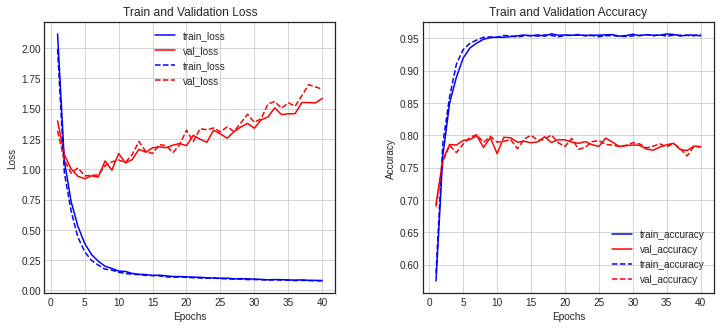

In [41]:
# [play ground]
# 이번 build_model() 함수의 인자는 각각 가중치 초기화 방법 하나입니다.

your_history = build_model(initializer = 'HeNormal')
diff_history(history, your_history)

## 8-4 배치정규화 (BatchNormalization)

정의) 모델이 입력되는 샘플들을 균일하게 만드는 방법, 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용시키는 것을 의미함 <br><br>

특징) 
- 보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행 <br>
- 학습자체ㅏ 빨리 진행될 수 있도록 만들고, 학습후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줌 <br>
- 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행 <br>
- 배치 정규화는 데이터 전처리 단계에서 진행해도 되짐나 졍규화가 되어서 레이어에 들어갔다는 보장이 없으므로 주로 Dense레이어 이후, 활성화 함수 이전에 활용 <br>
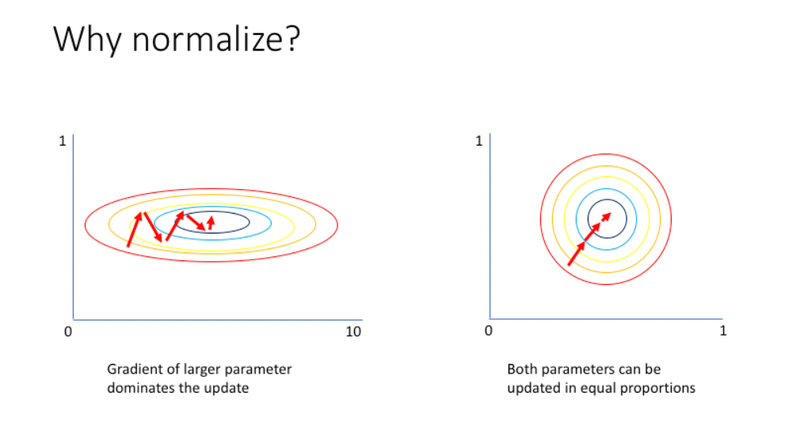 <br>

#### 모델 구성및 컴파일

Reuters 데이터셋에 대해 뉴스 주제를 분류하는 딥러닝 모델에서 기존에 정의했던 3개의 Dense 레이어 사이에 배치 정규화를 위해 BatchNormalization() 레이어를 추가합니다. 다만 일반적으로 Dense 레이어와 Activation 활성함수 레이어 사이에 추가해야 합니다.

In [42]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)              

In [43]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 34ms/step - loss: 1.7456 - accuracy: 0.6481 - val_loss: 3.3346 - val_accuracy: 0.7458
Epoch 2/40
18/18 [==============================] - 0s 14ms/step - loss: 0.6316 - accuracy: 0.8789 - val_loss: 3.1208 - val_accuracy: 0.7591
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3473 - accuracy: 0.9323 - val_loss: 2.8472 - val_accuracy: 0.7351
Epoch 4/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2294 - accuracy: 0.9476 - val_loss: 2.5132 - val_accuracy: 0.7008
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.1782 - accuracy: 0.9510 - val_loss: 2.2125 - val_accuracy: 0.7248
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1548 - accuracy: 0.9522 - val_loss: 1.9386 - val_accuracy: 0.7355
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1369 - accuracy: 0.9527 - val_loss: 1.6132 - val_accuracy: 0.7614
Epoch 8/40
18

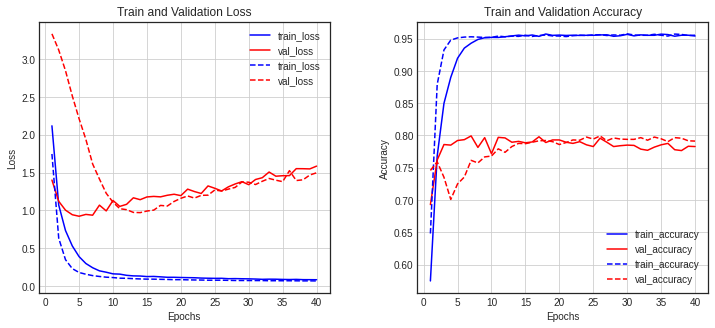

In [44]:
diff_history(history, batch_norm_history)

# 기본 모델과 배치 정규화를 적용한 모델을 비교해보면, 
# 배치 정규화를 적용한 모델이 좀 더 빠르고 안정되게 학습이 되는 것을 알 수 있습니다.

#### 실습해보기

활성화 함수 다음에 BatchNormalization() 레이어를 추가하고 성능을 비교해 봅시다.

In [45]:
# [play ground]

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))

# 활성화 함수를 Dense 레이어와 같이 선언할 수도 있지만 단순히 위 코드에서 순서를 바꾸어도 동일하게 동작합니다.
model.add(layers.Activation('relu')) 
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, name='hidden'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 46)              

In [48]:
history_has_begun = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 29ms/step - loss: 0.0704 - accuracy: 0.9575 - val_loss: 1.4036 - val_accuracy: 0.8001
Epoch 2/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0688 - accuracy: 0.9552 - val_loss: 1.3926 - val_accuracy: 0.7974
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.0687 - accuracy: 0.9555 - val_loss: 1.4378 - val_accuracy: 0.7890
Epoch 4/40
18/18 [==============================] - 0s 15ms/step - loss: 0.0679 - accuracy: 0.9584 - val_loss: 1.3797 - val_accuracy: 0.7956
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.0674 - accuracy: 0.9571 - val_loss: 1.3715 - val_accuracy: 0.7979
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.0683 - accuracy: 0.9578 - val_loss: 1.4148 - val_accuracy: 0.7970
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.0667 - accuracy: 0.9570 - val_loss: 1.4033 - val_accuracy: 0.7974
Epoch 8/40
18

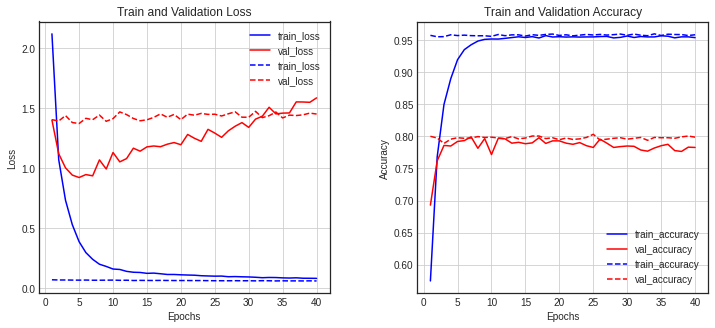

In [49]:
diff_history(history, history_has_begun)